### Data description(데이터 설명)
- (객관적 사실 데이터) Objective: factual information;
- (의료적 관찰 데이터) Examination: results of medical examination;
- (환자 응답 데이터) Subjective: information given by the patient.
1. (나이) Age | Objective Feature | age | int (days)
2. (키) Height | Objective Feature | height | int (cm) |
3. (몸무게) Weight | Objective Feature | weight | float (kg) |
4. (성별) Gender | Objective Feature | gender | categorical code |
5. (수축기 혈압) Systolic blood pressure | Examination Feature | ap_hi | int |
6. (이완기 혈압) Diastolic blood pressure | Examination Feature | ap_lo | int |
7. (콜레스테롤 수치) Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. (당수치) Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. (흡연여부) Smoking | Subjective Feature | smoke | binary |
10. (음주여부) Alcohol intake | Subjective Feature | alco | binary |
11. (신체활동/운동 여부) Physical activity | Subjective Feature | active | binary |
12.(심혈관질환 여부) Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## 링크 : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/cardio_train.csv',sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


- 중복 데이터 제거를 함.

In [3]:
data.drop('id',axis=1,inplace=True)
data.drop_duplicates(inplace=True)

In [4]:
#bm 계산
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [5]:
out_filter2 = ((data["ap_hi"]<0) | (data["ap_lo"]<0))
data = data[~out_filter2]

In [6]:
len(data)

68975

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [8]:
data.isna().sum()
#data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000
mean,19463.874433,1.348793,164.359681,74.121414,126.324842,81.334585,1.364509,1.225937,0.087901,0.053614,0.803277,0.494947,27.525663
std,2468.389304,0.476592,8.205382,14.329915,17.710918,9.874490,0.678783,0.571896,0.283154,0.225255,0.397524,0.499978,6.081430
min,10798.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [10]:
data['cardio'].value_counts()

0    34836
1    34139
Name: cardio, dtype: int64

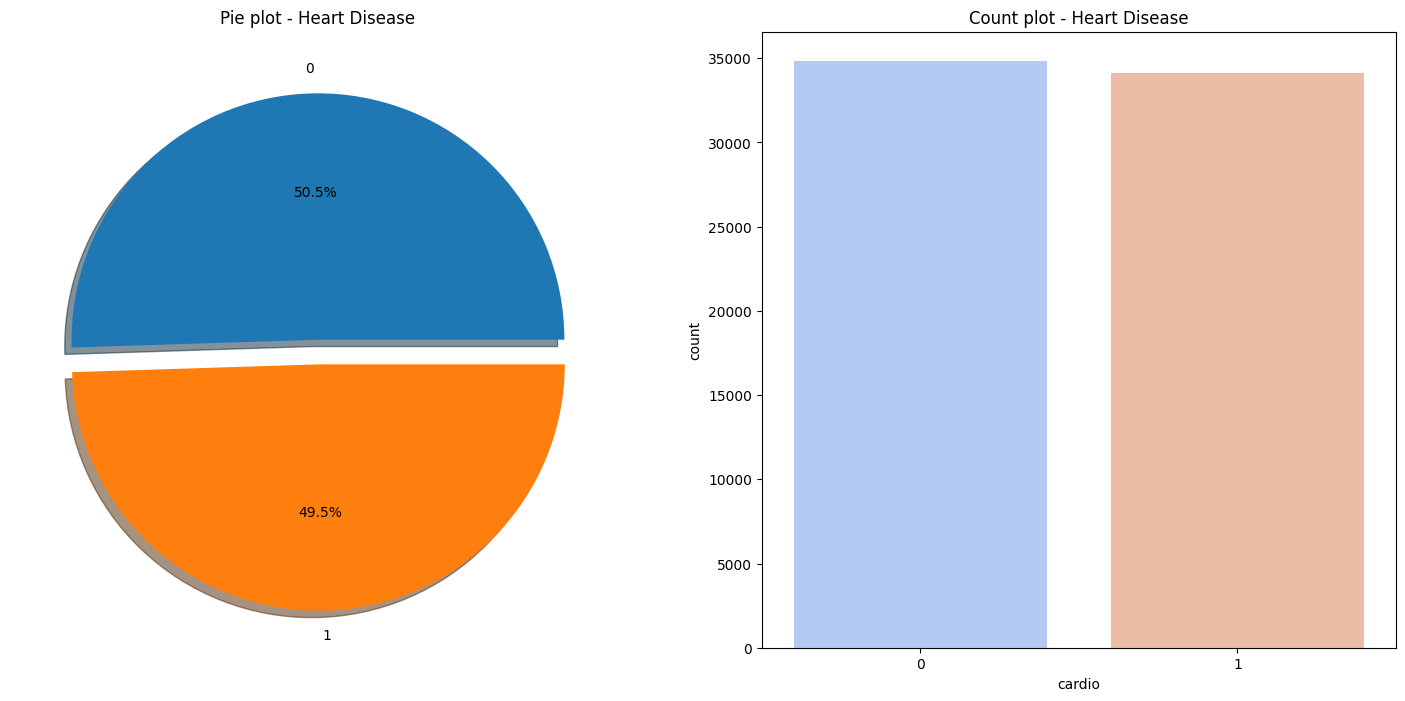

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data["cardio"].value_counts().plot.pie(ax=ax[0], shadow=True, explode=[0, 0.1], autopct='%1.1f%%')
#shadow : 그림자, explode : 두 조각간의 거리, autopct : 각 범주가 데이터에서 차지하는 비율
ax[0].set_title('Pie plot - Heart Disease')
ax[0].set_ylabel('')
sns.countplot(x='cardio', data=data, ax=ax[1],palette='coolwarm')
ax[1].set_title('Count plot - Heart Disease')

plt.show()

- 데이터가 고르게 분포되어 있음.

- 나이대 별로 심장 질환을 비율을 봐보자.

In [12]:
data[['age','cardio']].groupby('cardio',as_index=True).mean()

,age
cardio,
0,18877.995608
1,20061.714872


<Axes: xlabel='years', ylabel='count'>

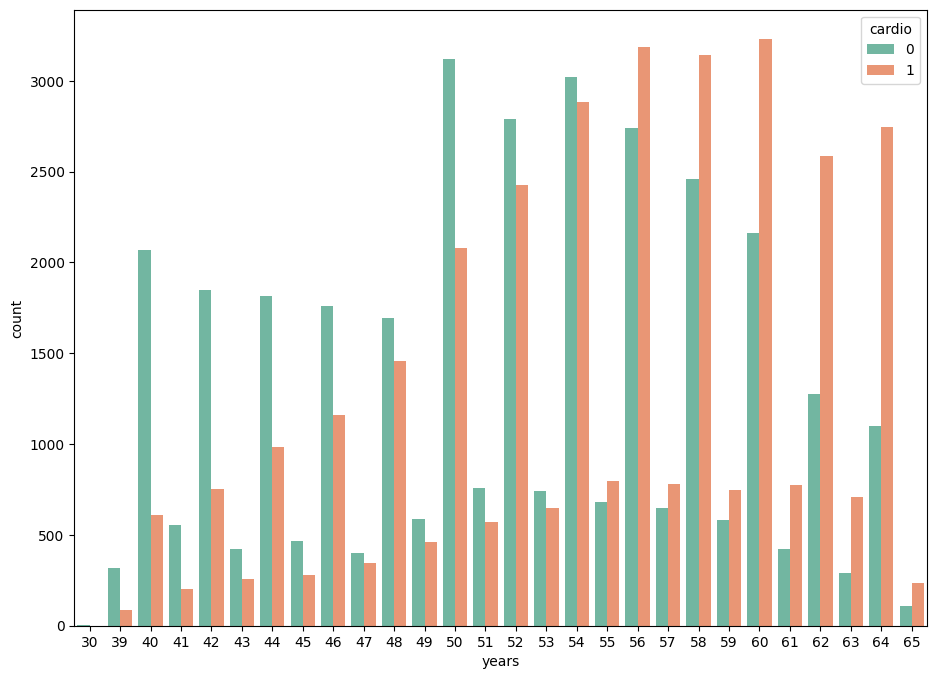

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age']/365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette='Set2')

- 55세 이상의 사람들의 심혈관 질환에 더 많이 노출 됨.

<Axes: xlabel='variable', ylabel='count'>

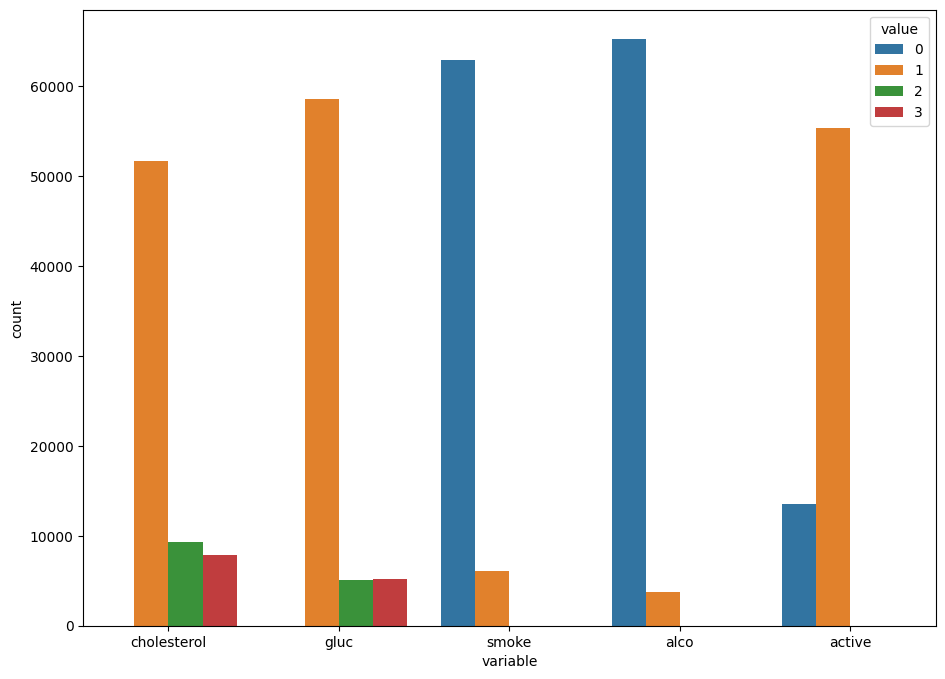

In [14]:
df_categorical = data.loc[:,['cholesterol','gluc','smoke','alco','active']]
sns.countplot(x='variable', hue= 'value',data = pd.melt(df_categorical))
#melt : 데이터 재구조화(reshape)과 비슷

- Bivariate anaylsis

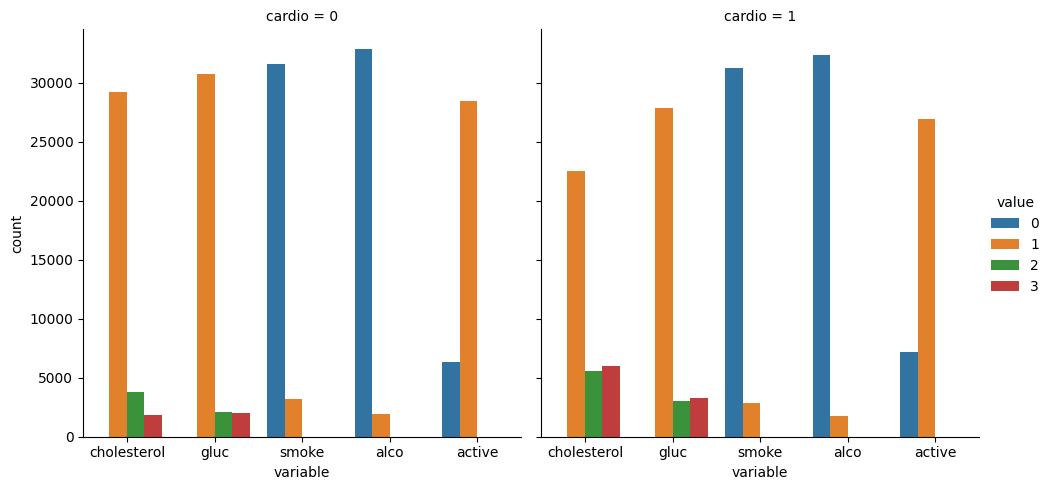

In [15]:
df_long = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=df_long, kind="count");

- 심혈관 환자는 콜레스트롤(Cholesterol)과 혈당수치(gluc)의 value(above normal), value3(well above normal)보다 더 높음

- 남성과 여성의 키를 비교해보자

In [16]:
data.groupby('gender')['height'].mean()

gender
1    161.368791
2    169.943761
Name: height, dtype: float64

In [17]:
data['gender'].value_counts()

1    44917
2    24058
Name: gender, dtype: int64

In [18]:
pd.crosstab(data['cardio'], data['gender'],normalize=True)

gender,1,2
cardio,,
0,0.330671,0.174382
1,0.320536,0.174411


<ipython-input-19-ea59343344b3>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype = np.bool)


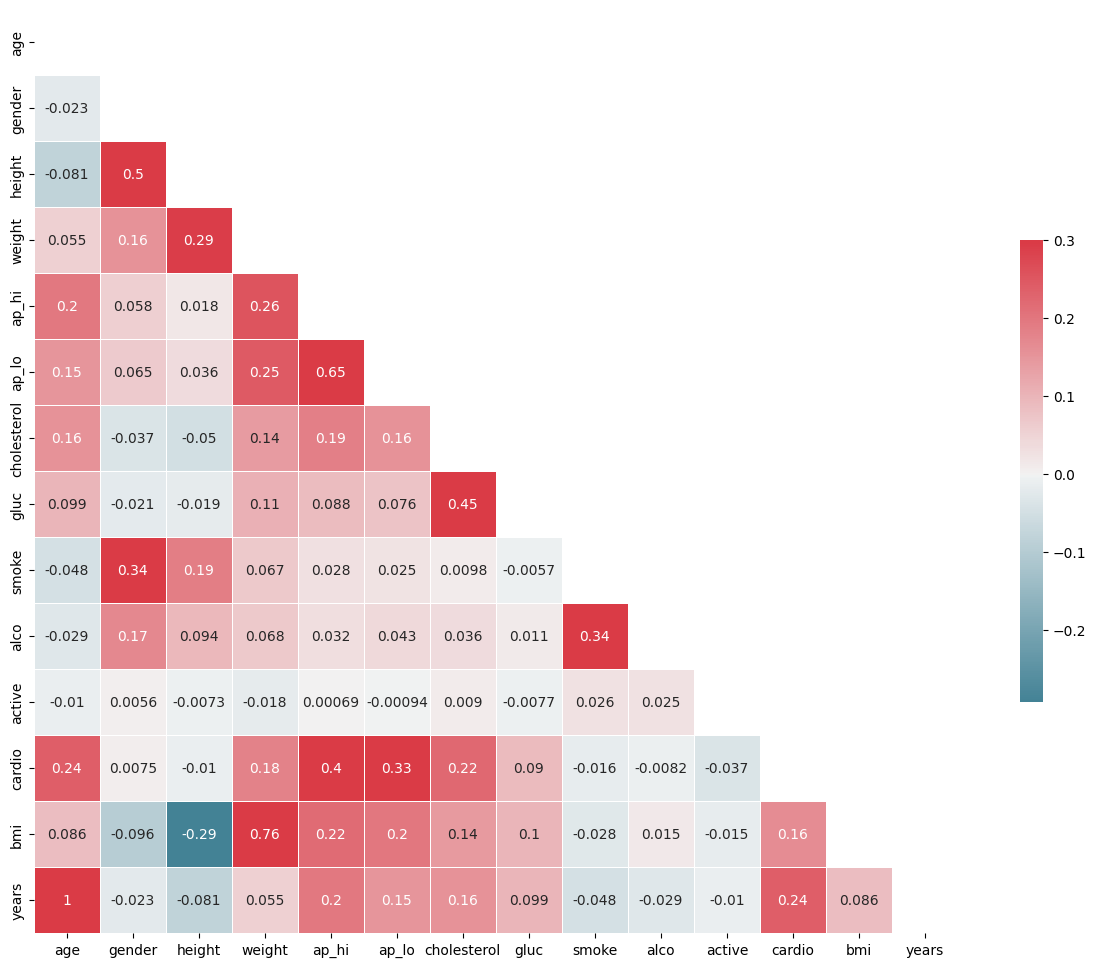

In [19]:
# Multivariate Analysis & Correlation Detection
import seaborn as sns
import numpy as np
correl = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

sns.heatmap(correl, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
           annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

- 이상치 제거
    - weight, heighs 2.5%미만, 97.5%의 해당되는 데이터를 삭제함.

In [20]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

- 어떤 경우에는 이완기 혈압이 수축기 혈압보다 높은 경우가 있다. 몇가지 해당이 될까?

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format
 (data[data['ap_lo']> data['ap_hi']].shape[0]))

In [22]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [ ]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format
 (data[data['ap_lo']> data['ap_hi']].shape[0]))

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
ProfileReport(data, title='cardio')

# 자동화 시각화 툴

- 참고 : https://wooiljeong.github.io/python/autoviz-quick-start/

In [25]:
!pip install autoviz --upgrade
!pip install xlrd --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 12.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/2

In [26]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline

# generating data visualization automatically
dftc = AV.AutoViz(
    filename='/content/drive/MyDrive/cardio_train.csv',
    sep=',',
    depVar='DEATH_EVENT',
    dfte=None,
    header=0,
    verbose=1, # print extra information on the notebook and also display charts
    lowess=False,
    chart_format='png',
    max_rows_analyzed=10000,
    max_cols_analyzed=30
)

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    max_rows_analyzed is smaller than dataset shape 70000...
        randomly sampled 10000 rows from read CSV file
Shape of your Data Set loaded: (10000, 1)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns = 

- Preparing to modeling

In [27]:
target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data, data_target,test_size=0.2, random_state=0)

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log = round(logreg.score(X_train,y_train)*100,2)
acc_log

In [90]:

acc_test_log = round(logreg.score(X_test,y_test)*100,2)
acc_test_log

71.32

In [ ]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Corrleation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Corrleation',ascending=False)

In [38]:
from sklearn.linear_model import Perceptron, RidgeClassifier,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

2. K-Nearest Neighbors

In [39]:
# k-Nearest Neighbors algorithm
from sklearn.model_selection import GridSearchCV
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(X_train,y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn, knn.best_params_)

81.13 {'n_neighbors': 3}


In [41]:
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_test_knn

65.46

3. Gaussian Navie bayes

In [42]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

70.77

In [43]:
acc_test_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_test_gaussian

70.89

4. Perceptron

In [44]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

51.16

In [45]:
acc_test_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_test_perceptron

51.25

5. Stochastic Gradient Descent

In [46]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

49.25

In [47]:
acc_test_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_test_sgd

49.05

6. Decision Tree

In [48]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.98

In [49]:
acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_test_decision_tree

62.6

7. Random Forest

In [51]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(X_train, y_train)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

99.98 {'n_estimators': 300}


In [52]:
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_test_random_forest

70.7

8. XGboost

- hyperparameter 찾기 시간이 너무 오래 걸려 포기

In [58]:
xgb= XGBClassifier()
# xgb_param_grid={
#     'n_estimators' : [100,200,300,400,500, 600],
#     'learning_rate' : [0.01,0.05,0.1],
#     'max_depth' : [2, 3, 4, 5]
#     }
# xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, cv=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
acc_XGB_Classifier = round(xgb.score(X_train, y_train) * 100, 2)
acc_XGB_Classifier

76.99

In [60]:
acc_test_XGB_Classifier = round(xgb.score(X_test, y_test) * 100, 2)
acc_test_XGB_Classifier

71.87

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1500x1500 with 0 Axes>

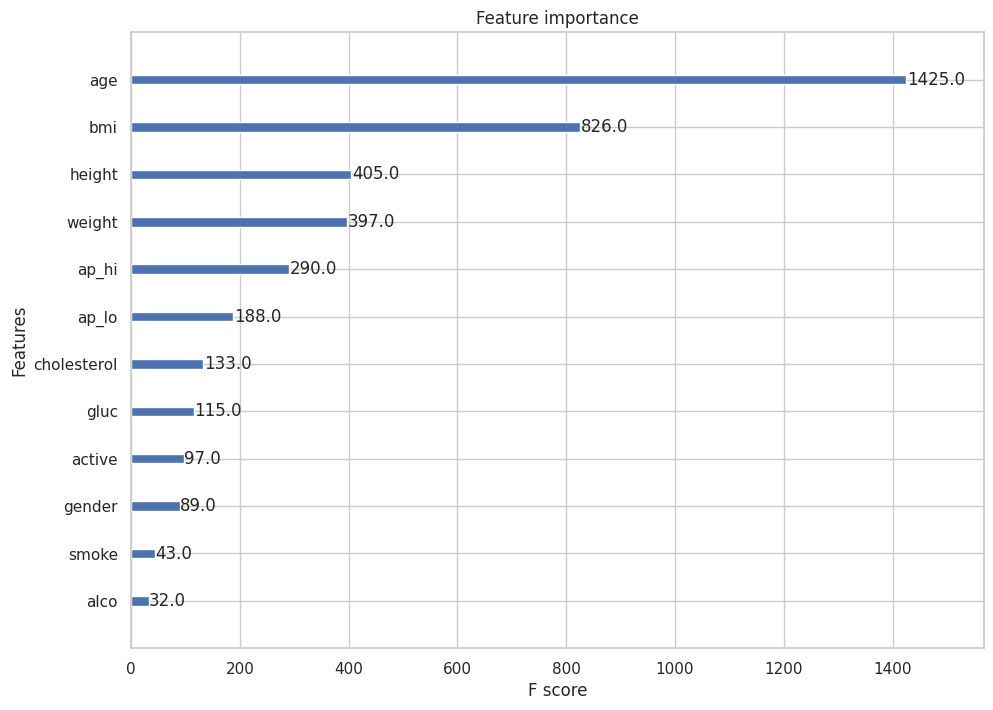

In [62]:
from xgboost import plot_importance
fig =  plt.figure(figsize = (15,15))
plot_importance(xgb)

10. LGBM Classifier

In [ ]:
# def hyperopt_lgb_score(params):
#     clf = LGBMClassifier(**params)
#     current_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
#     print(current_score, params)
#     return current_score

# space_lgb = {
#             'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
#             'n_estimators': hp.choice('n_estimators', range(100, 1000)),
#             'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
#             'num_leaves': hp.choice('num_leaves', 2*np.arange(2, 2**11, dtype=int)),
#             'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
#             'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
#             'objective': 'binary',
#             'boosting_type': 'gbdt',
#             }

# best = fmin(fn=hyperopt_lgb_score, space=space_lgb, algo=tpe.suggest, max_evals=10)
# print('best:')
# print(best)

In [ ]:
# params = space_eval(space_lgb, best)
# params

In [63]:
# LGB_Classifier = LGBMClassifier(**params)
LGB_Classifier = LGBMClassifier()
LGB_Classifier.fit(X_train, y_train)
acc_LGB_Classifier = round(LGB_Classifier.score(X_train, y_train) * 100, 2)
acc_LGB_Classifier

[LightGBM] [Info] Number of positive: 23486, number of negative: 24600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 48086, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488417 -> initscore=-0.046342
[LightGBM] [Info] Start training from score -0.046342


74.42

In [64]:
acc_test_LGB_Classifier = round(LGB_Classifier.score(X_test, y_test) * 100, 2)
acc_test_LGB_Classifier

72.67

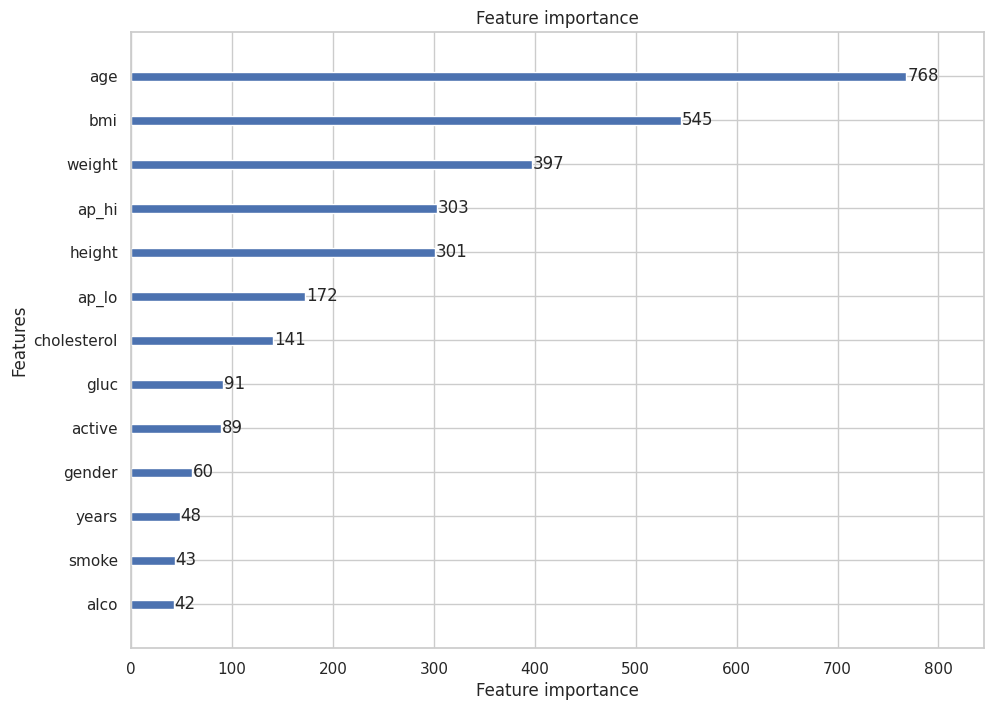

In [70]:
import lightgbm as lgb
# Plot feature importance using Gain
lgb.plot_importance(LGB_Classifier)
plt.show()

11. GraidentBoostingClassifier

In [ ]:
# def hyperopt_gb_score(params):
#     clf = GradientBoostingClassifier(**params)
#     current_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
#     print(current_score, params)
#     return current_score

# space_gb = {
#             'n_estimators': hp.choice('n_estimators', range(100, 1000)),
#             'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))
#         }

# best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
# print('best:')
# print(best)

In [ ]:
# params = space_eval(space_gb, best)
# params

In [71]:
# Gradient Boosting Classifier

# gradient_boosting = GradientBoostingClassifier(**params)
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
acc_gradient_boosting = round(gradient_boosting.score(X_train, y_train) * 100, 2)
acc_gradient_boosting

73.19

In [72]:
acc_test_gradient_boosting = round(gradient_boosting.score(X_test, y_test) * 100, 2)
acc_test_gradient_boosting

72.69

12. Ridge Classifier

In [73]:
# Ridge Classifier

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
acc_ridge_classifier = round(ridge_classifier.score(X_train, y_train) * 100, 2)
acc_ridge_classifier

72.01

In [74]:
acc_test_ridge_classifier = round(ridge_classifier.score(X_test, y_test) * 100, 2)
acc_test_ridge_classifier

71.88

In [76]:
# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

13. Neural Network 1

In [77]:
def build_ann(optimizer='adam'):

    # Initializing the ANN
    ann = Sequential()

    # Adding the input layer and the first hidden layer of the ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(len(X_train.columns),)))

    # Add other layers, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))

    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return ann

In [79]:
import tensorflow as tf
opt = tf.optimizers.Adam(lr=0.001)
ann = build_ann(opt)
# Training the ANN
history = ann.fit(X_train,y_train, batch_size=16, epochs=10, validation_split=0.1)

Epoch 1/10
2705/2705 [==============================] - 15s 5ms/step - loss: 24.5703 - accuracy: 0.5116 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 2/10
2705/2705 [==============================] - 6s 2ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 3/10
2705/2705 [==============================] - 7s 3ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 4/10
2705/2705 [==============================] - 6s 2ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6930 - val_accuracy: 0.5120
Epoch 5/10
2705/2705 [==============================] - 7s 3ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 6/10
2705/2705 [==============================] - 6s 2ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 7/10
2705/2705 [==============================] - 7s 3ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6929 - val_accurac

In [80]:
from sklearn import metrics
# Predicting the Train set results
ann_prediction = ann.predict(X_train)
ann_prediction = (ann_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_ann1 = round(metrics.accuracy_score(y_train, ann_prediction) * 100, 2)
acc_ann1

1503/1503 [==============================] - 2s 1ms/step


51.16

In [81]:
# Predicting the Test set results
ann_prediction_test = ann.predict(X_test)
ann_prediction_test = (ann_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_test_ann1 = round(metrics.accuracy_score(y_test, ann_prediction_test) * 100, 2)
acc_test_ann1

376/376 [==============================] - 1s 1ms/step


51.25

14. Neural Network2

In [82]:
# Model
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                224       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3425 (13.38 KB)
Trainable params: 3425 (

In [83]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
es = EarlyStopping(monitor='val_accuracy', patience=20, mode='max')
hist = model.fit(X_train, y_train, batch_size=64, validation_split=0.1,
               epochs=10, verbose=1, callbacks=[es])

Epoch 1/10
677/677 [==============================] - 5s 7ms/step - loss: 25.1918 - accuracy: 0.5005 - val_loss: 0.9145 - val_accuracy: 0.5120
Epoch 2/10
677/677 [==============================] - 5s 7ms/step - loss: 6.9251 - accuracy: 0.5012 - val_loss: 2.7139 - val_accuracy: 0.4880
Epoch 3/10
677/677 [==============================] - 5s 7ms/step - loss: 2.0268 - accuracy: 0.5032 - val_loss: 0.6833 - val_accuracy: 0.5664
Epoch 4/10
677/677 [==============================] - 3s 5ms/step - loss: 0.8663 - accuracy: 0.5096 - val_loss: 0.6904 - val_accuracy: 0.5369
Epoch 5/10
677/677 [==============================] - 2s 3ms/step - loss: 0.7012 - accuracy: 0.5111 - val_loss: 0.6933 - val_accuracy: 0.5120
Epoch 6/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 7/10
677/677 [==============================] - 3s 4ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch

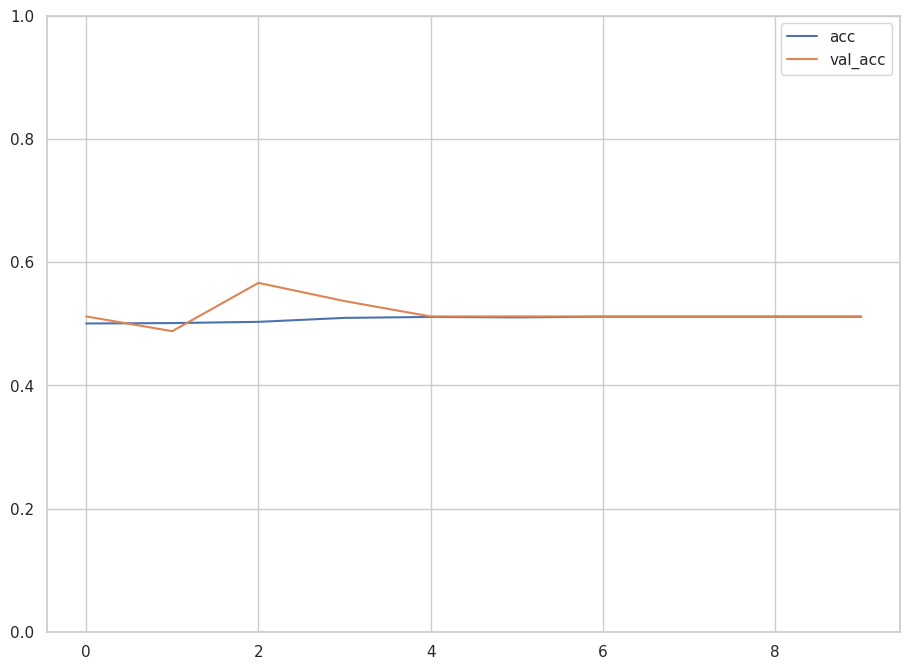

In [86]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.ylim((0, 1))
plt.legend()

In [87]:
# Predicting the Train set results
nn_prediction = model.predict(X_train)
nn_prediction = (nn_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_ann2 = round(metrics.accuracy_score(y_train, nn_prediction) * 100, 2)
acc_ann2

1503/1503 [==============================] - 3s 2ms/step


51.16

In [88]:
# Predicting the Test set results
nn_prediction_test = model.predict(X_test)
nn_prediction_test = (nn_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_test_ann2 = round(metrics.accuracy_score(y_test, nn_prediction_test) * 100, 2)
acc_test_ann2

376/376 [==============================] - 1s 3ms/step


51.25

In [91]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-Nearest Neighbors', 'Naive Bayes',
              'Perceptron', 'Stochastic Gradient Decent',
              'Decision Tree Classifier', 'Random Forest',  'XGBClassifier', 'LGBMClassifier',
              'GradientBoostingClassifier', 'RidgeClassifier',
              'Neural Network 1', 'Neural Network 2',],

    'Score_train': [acc_log, acc_knn, acc_gaussian,
              acc_perceptron, acc_sgd,
              acc_decision_tree, acc_random_forest, acc_XGB_Classifier, acc_LGB_Classifier,
              acc_gradient_boosting, acc_ridge_classifier,
              acc_ann1, acc_ann2,
              ],
    'Score_test': [acc_test_log, acc_test_knn, acc_test_gaussian,
              acc_test_perceptron, acc_test_sgd,
              acc_test_decision_tree, acc_test_random_forest, acc_test_XGB_Classifier, acc_test_LGB_Classifier,
              acc_test_gradient_boosting, acc_test_ridge_classifier,
              acc_test_ann1, acc_test_ann2, ]
                    })

In [92]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
6,Random Forest,99.98,70.70
5,Decision Tree Classifier,99.98,62.60
1,k-Nearest Neighbors,81.13,65.46
7,XGBClassifier,76.99,71.87
8,LGBMClassifier,74.42,72.67
9,GradientBoostingClassifier,73.19,72.69
10,RidgeClassifier,72.01,71.88
0,Logistic Regression,71.55,71.32
2,Naive Bayes,70.77,70.89
3,Perceptron,51.16,51.25


In [93]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
9,GradientBoostingClassifier,73.19,72.69
8,LGBMClassifier,74.42,72.67
10,RidgeClassifier,72.01,71.88
7,XGBClassifier,76.99,71.87
0,Logistic Regression,71.55,71.32
2,Naive Bayes,70.77,70.89
6,Random Forest,99.98,70.70
1,k-Nearest Neighbors,81.13,65.46
5,Decision Tree Classifier,99.98,62.60
3,Perceptron,51.16,51.25


In [94]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
3,Perceptron,51.16,51.25,0.09
11,Neural Network 1,51.16,51.25,0.09
12,Neural Network 2,51.16,51.25,0.09
2,Naive Bayes,70.77,70.89,0.12
10,RidgeClassifier,72.01,71.88,0.13
4,Stochastic Gradient Decent,49.25,49.05,0.20
0,Logistic Regression,71.55,71.32,0.23
9,GradientBoostingClassifier,73.19,72.69,0.50
8,LGBMClassifier,74.42,72.67,1.75
7,XGBClassifier,76.99,71.87,5.12


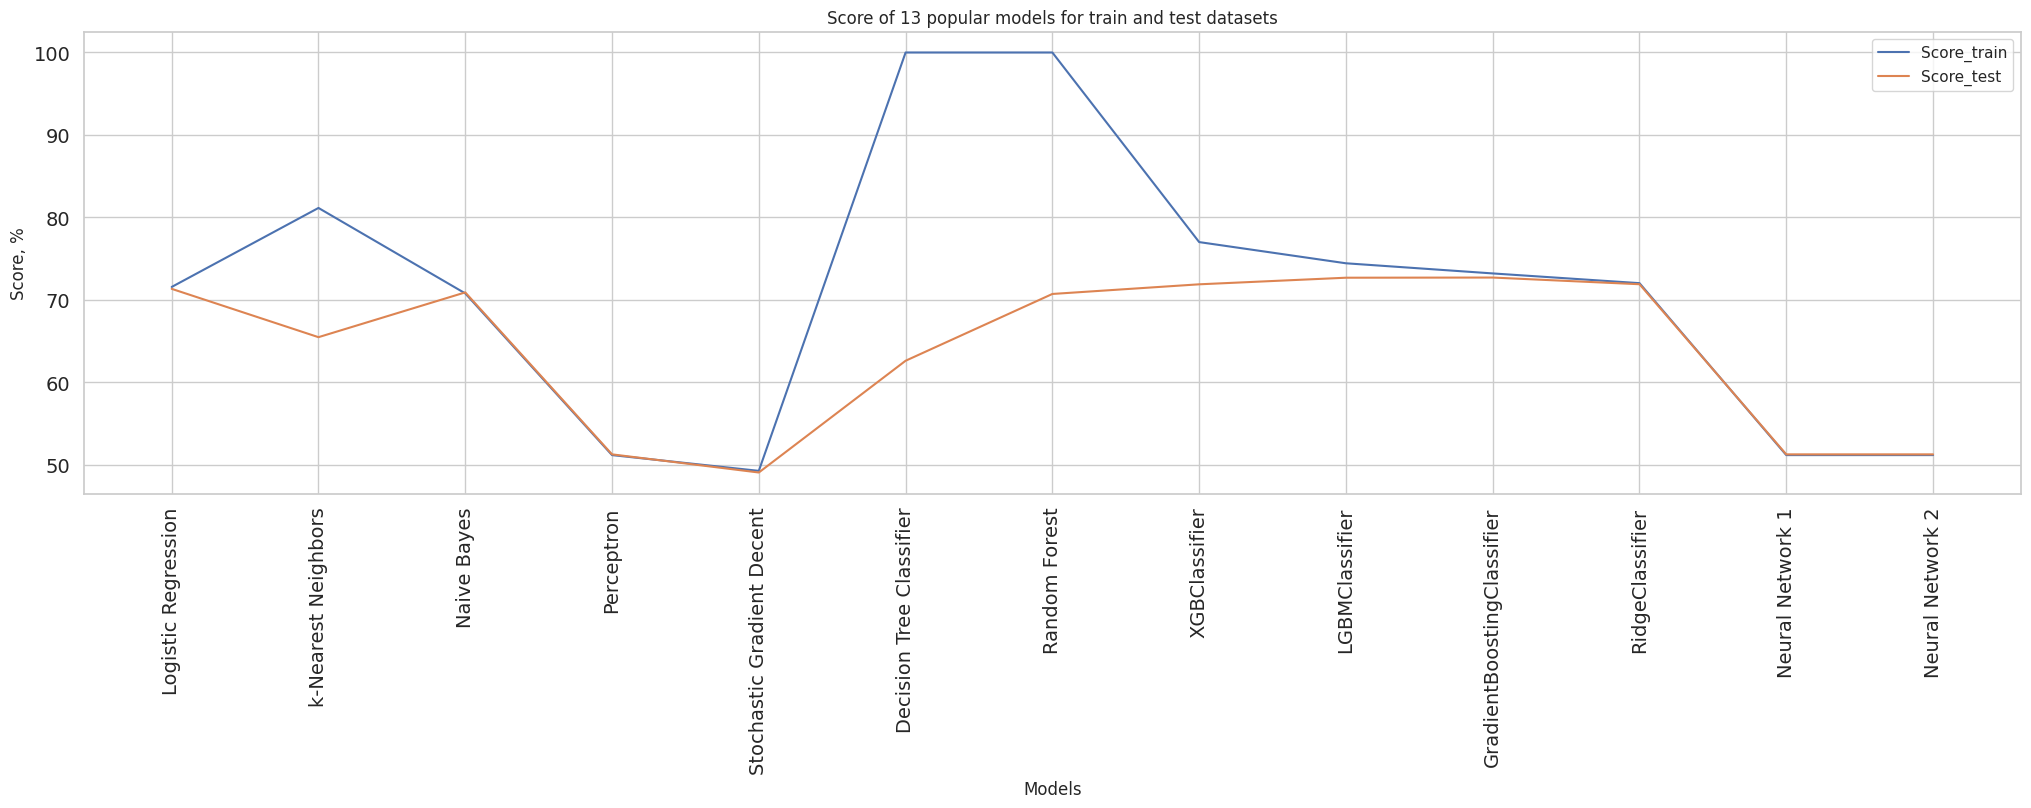

In [96]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 13 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()